<a href="https://colab.research.google.com/github/swilsonmfc/deeplearning/blob/master/ReutersKerasMulticlass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
* Multiclass Classification
* Preloaded Dataset Keras - Reuters
* Topic Classification
* Simple 3 layer model
* Softmax 46 categorical output


In [0]:
import numpy as np
import matplotlib.pyplot as plt 

from keras import layers
from keras import models
from keras import losses
from keras import metrics
from keras import optimizers

from keras.datasets import reuters

Using TensorFlow backend.


# Load Data

In [0]:
[train_data, train_labels], [test_data, test_labels] = reuters.load_data(num_words=10000)

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
X_train = vectorize_sequences(train_data)
X_test  = vectorize_sequences(test_data)

In [0]:
# Function to create a one hot encoded topic - could have 
# used keras.utils.np_utils.to_categorical
def onehot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [0]:
ohe_train = onehot(train_labels)
ohe_test  = onehot(test_labels)

# Define Model

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


# Compile & Fit Model

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.categorical_crossentropy,
             metrics=[metrics.categorical_accuracy])

In [0]:
X_val = X_train[:1000]
X_train_part = X_train[1000:]

y_val = ohe_train[:1000]
y_train_part = ohe_train[1000:]

In [0]:
history = model.fit(X_train_part,
                    y_train_part,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 186us/step - loss: 2.7626 - categorical_accuracy: 0.5013 - val_loss: 1.8863 - val_categorical_accuracy: 0.6540
Epoch 2/20
7982/7982 [==============================] - 1s 156us/step - loss: 1.5039 - categorical_accuracy: 0.6942 - val_loss: 1.3342 - val_categorical_accuracy: 0.7120
Epoch 3/20
7982/7982 [==============================] - 1s 158us/step - loss: 1.0889 - categorical_accuracy: 0.7611 - val_loss: 1.1492 - val_categorical_accuracy: 0.7390
Epoch 4/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.8566 - categorical_accuracy: 0.8145 - val_loss: 1.0371 - val_categorical_accuracy: 0.7750
Epoch 5/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.6823 - categorical_accuracy: 0.8530 - val_loss: 0.9679 - val_categorical_accuracy: 0.7920
Epoch 6

# Training & Validation Loss

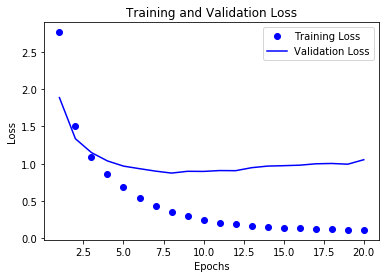

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Training & Validation Accuracy

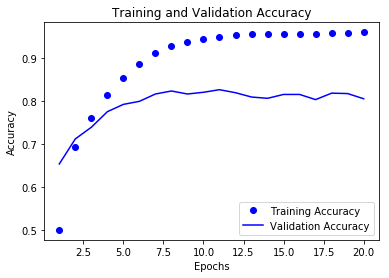

In [0]:
loss = history.history['categorical_accuracy']
val_loss = history.history['val_categorical_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Accuracy')
plt.plot(epochs, val_loss, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Overfitting
* Overfitting somewhere around 7-11 epochs - pick 9
* Retrain model on all data and estimate performance on test

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.categorical_crossentropy,
             metrics=[metrics.categorical_accuracy])

In [0]:
history = model.fit(X_train,
                    ohe_train,
                    epochs=9,
                    batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 2s 171us/step - loss: 2.6204 - categorical_accuracy: 0.5210
Epoch 2/9
8982/8982 [==============================] - 1s 148us/step - loss: 1.3520 - categorical_accuracy: 0.7190
Epoch 3/9
8982/8982 [==============================] - 1s 139us/step - loss: 0.9972 - categorical_accuracy: 0.7859
Epoch 4/9
8982/8982 [==============================] - 1s 140us/step - loss: 0.7872 - categorical_accuracy: 0.8346
Epoch 5/9
8982/8982 [==============================] - 1s 152us/step - loss: 0.6248 - categorical_accuracy: 0.8678
Epoch 6/9
8982/8982 [==============================] - 1s 151us/step - loss: 0.4974 - categorical_accuracy: 0.8965
Epoch 7/9
8982/8982 [==============================] - 1s 132us/step - loss: 0.4014 - categorical_accuracy: 0.9164
Epoch 8/9
8982/8982 [==============================] - 1s 124us/step - loss: 0.3307 - categorical_accuracy: 0.9309
Epoch 9/9
8982/8982 [==============================] - 1s 147us/step - loss: 0.2

In [0]:
results = model.evaluate(X_test, ohe_test)
print('Loss {}  Accuracy {}'.format(results[0], results[1]))

2246/2246 [==============================] - 0s 135us/step
Loss 0.9641578535044288  Accuracy 0.7894033838199487
